# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
#ваш код
import pandas as pd
import zipfile
zf = zipfile.ZipFile('data/Advertising.zip')
df = pd.read_csv(zf.open('Advertising.csv'))

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код
df.info()

### данные не содержат пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
#ваш код
X = df[['TV','radio','newspaper']].to_numpy()
y = df['sales'].to_numpy()

### удалил первый столбец Unnamed: 0, который по сути был индексом

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
#ваш код
w = np.zeros(X.shape[1])
for i in range(1000):
    r = y - X@w
    for j in range(X.shape[1]):
        r = r + X[:,j]*w[j]
        w[j] = X[:,j]@r
        r = r - X[:,j]*w[j]

print(w) #веса в модели линейной регрессии


[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
#ваш код
X = df[['TV','radio','newspaper']].to_numpy()
X = (X - X.mean())/X.std()

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
#ваш код
def mse_error(y,y_pred):
    return np.mean((y - y_pred)**2)


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [40]:
#ваш код
y_pred = y.mean()
mse_naiv = mse_error(y,y_pred)
print(mse_naiv)

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
#ваш код
def lin_pred(X,w):
    return np.dot(X,w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
#ваш код
def stoch_grad_step(X,y,w,train_ind,eta):
    grad_array = np.zeros(np.shape(X)[1])
    for i in range(0, np.shape(X)[1]):
        grad_array[i] = 2 * X[train_ind][i] *(sum(w * X[train_ind]) - y[train_ind]) /  np.shape(X)[0]
    return  w - eta * grad_array

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
# ваш код

def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # Делаем шаг стохастического градиентного спуска
        w_new = stoch_grad_step(X, y, w, random_ind,eta)
        # Считаем дистанцию между старым и новым значениями вектора весов
        weight_dist = np.linalg.norm(w_new - w)
        w = w_new
        # Считаем ошибку предсказания
        errors.append(mse_error(y, lin_pred(X, w)))
        iter_num +=1
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [15]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(np.shape(X)[1]), max_iter=1e5)

CPU times: total: 3.89 s
Wall time: 4.01 s


**Постройте график зависимости ошибки от номера итерации**

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

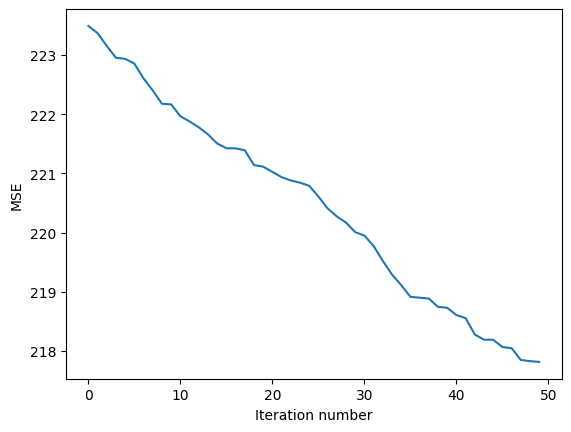

In [41]:
# ваш код
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

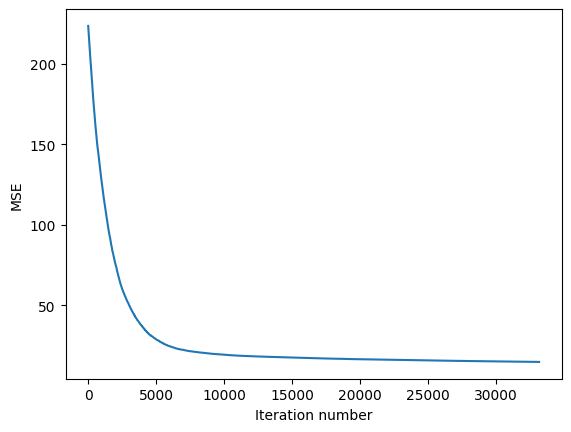

In [42]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Выведите вектор весов, к которому сошелся метод.**

In [43]:
# ваш код
stoch_grad_desc_weights

array([ 7.01172224,  4.31995287, -1.88254217, -1.86589404])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [47]:
# ваш код
mse_sgd_self = stoch_errors_by_iter[-1]
print(mse_sgd_self)

14.872550906780774


In [58]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [63]:
n_iter=5
sgd_reg = SGDRegressor(max_iter=n_iter)

sgd_reg.fit(X, y)
y_pred = sgd_reg.predict(X)

c:\Users\Наташа\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [54]:
mse_sklearn = mse_error(y,y_pred)
print('наивный прогноз:', mse_naiv)
print('самостоятельно написанная:', mse_sgd_self)
print('из sklearn:', mse_sklearn)

наивный прогноз: 27.085743750000002
самостоятельно написанная: 14.872550906780774
из sklearn: 2.5957243391524703e+26


In [69]:
from sklearn import metrics
metrics.mean_squared_error(y, y_pred)

4.345080635501051e+26